------------------------------------------------------------------
# Homework set 8 - solution

**Author**: Balint Szoke

**UniID**: bs2574

-------------------------------------------------------------------


# Exercise 1

**CLAIM:** Let $S$ be a discrete set. If $\mathcal{P}(S) = \{\phi\in l_1^{+}(S) : \|\phi\| = 1 \}$ is a compact subset of $(l_1(S), \| \cdot \| )$, then $S$ must be finite. 

*Proof: (contrapositive)* 

Suppose that the cardinality of $S$ is $|S| = |\mathbb{N}|$ and consider the following open cover of $\mathcal{P}(S)$:

\begin{align}
\mathcal{C} \equiv \left\{ B_{2}(\delta_x) : x\in S\right\}\quad \text{where}\quad B_{\epsilon}(\delta_x) = \{h \in l_1(S) : \|h- \delta_x \|_1 < \epsilon\}\quad \forall \epsilon >0
\end{align}

Clearly, $\forall \phi \in \mathcal{P}(S)$ and $\forall x\in S$, we have $\|\phi - \delta_x\|_1 = 2(1-\phi(x))$ for all $x\in S$. Moreover, since for all $\phi$, $\exists \bar{x}\in S$ such that $\phi(\bar{x}) > 0$, we have $\phi\in B_2(\delta_{\bar{x}})$, thus $\mathcal{C}$ is indeed an open cover of $\mathcal{P}(S)$. 

If the set $\mathcal{P}(S)$ is compact, we should be able to find a finite subcover of $\mathcal{C}$. Since $S$ is countably infinite, this is impossible: taking any ball, say that with the center $\delta_y$, out of $\mathcal{C}$ would imply that $\delta_y\in\mathcal{P}(S)$ is not in $\bigcup \mathcal{C}\setminus B_2(\delta_y)$. This is due to the fact that $\|\delta_x - \delta_z\| = 2$, whenever $x\neq z$. In other words, we found an open cover $\mathcal{C}$ of $\mathcal{P}(S)$, which does not have a finite subcover implying that $\mathcal{P}(S)$ cannot be a compact subset of $(l_1(S), \| \cdot \| )$.  

---------------------------------------
# Exercise 2

**CLAIM:** The following deterministic Markov chain has no stationary distribution: $X_{t+1} = X_t + 1$ on $S = \mathbb{Z}$. 

*Proof:* 

Take any candidate distribution $\pi \in \mathcal{P}(S)$ and an arbitrary $x\in S$ and use the stochastic kernel to derive the one-step ahead marginal density 

\begin{align}
\pi'(y) = \sum_{x \in S} \pi(x) p(x, y)= \sum_{x \in S} \pi(x) \mathbb{1}\{ y = x -1\} = \pi(y-1)\quad \forall y\in S
\end{align}

Suppose that $\pi$ is the stationary distribution of the Markov Chain (i.e. $\pi'=\pi$). Then the above implies that $\pi(y)=\pi(y-1)$, for all $y\in S$, hence $\sum_{y\in S} \pi(y)$ is either $\infty$ or $0$, which is a contradiction to $\sum_{y\in S} \pi(y) = 1$.  

----------------------------------------------
# Exercise 3

For given $q, Q \in \mathbb{Z}$, s.t. $0\leq q \leq Q$, the $(s,S)$-strategy gives rise to the following transition equation of $X_t$ (inventory level at the start of period $t$)

\begin{align}
X_{t+1} = \max\{ Q\mathbb{I}\{X_t \leq q\} + X_t\mathbb{I}\{X_t > q\}  - D_{t+1}, 0\}
\end{align}

where $D_{t+1}$ follows an iid distribution with $\mathbb{P}\{D_{t+1} = d\} = \left(\frac12\right)^{d+1}$ for $d = 0,1,2,\dots$. From this law of motion, one can see that $X_t$ must come from the finite set $S = \mathbb{Z}\cap[0,Q]$ provided that $X_0\in S$. (see the remark below)

Notice that the stochastic kernel has the following property

\begin{align}
p(x,y)=0 \quad \text{iff}\quad [(x > q) \wedge (y > x)]
\end{align}

This implies that $\forall (x,y)\in S\times S$, we have

\begin{align}
p^2(x,y) = \sum_{z \in S} p(x,z)p(z,y) > 0 
\end{align}

because for $z=0$, both $p(x,z)$ and $p(z,y)$ are strictly positive irrepective of $x,y\in S$. Due to the finiteness of $S$, this property suffices for the global stability of $p^2$ implying global stability of $p$.


> **Remark:** The assumption that $X_0\in S$ is without loss of generality in the following sense. If $X_0 > Q$, although the (finite) stochastic kernel is not irreducible any more, there is a **unique** ergodic set $\mathbb{Z}\cap[0,Q]$. This follows from the infinite support of $D_t$: due to this fact, there is a state, namely $y=0$, such that $\forall x\in \mathbb{Z}\cap[0,X_0]$, $p(x,y)>0$. Using standard arguments (see e.g. Theorem 11.2 in Stokey and Lucas (1989)), this implies that $p$ has a unique ergodic set and a globally stable stationary distribution.   



--------------------------------------------
# Exercise 4

In [1]:
%matplotlib inline
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
import seaborn as sb

The stochastic kernel is a $(Q+1) \times (Q+1)$ matrix. Notice that the rows $p(x, \cdot)$ can be written as

 - when $q \geq x$, we have $p(x, \cdot) = \left[ 1 - \sum_{i = 1}^{Q} \left(\frac12\right)^{i}, \left(\frac12\right)^{Q}, \dots, \frac12\right]$

 - when $q < x \leq Q$, we have  $p(x, \cdot) = \left[1 - \sum_{i = 1}^{x} \left(\frac12\right)^{i}, \left(\frac12\right)^{x}, \dots, \frac12, 0, \dots, 0\right]$

In [2]:
def stoch_kernel(q, Q):
    """
    This function calculates the stochastic kernel for X_t associated with 
    a particular pair (q,Q). 
    
    """
    
    if q > Q or q < 0:
        raise ValueError("The following condition must hold: 0 <= q <= Q.")
    
    N = int(Q) + 1
    p = np.zeros((N, N))
    
    #first q rows:
    first_q_rows = (.5)**np.arange(N, 0, -1).reshape(1, N)
    first_q_rows[0, 0] += 1 - first_q_rows.sum()              # residual prob  
    p[range(q + 1), :] = np.ones((q + 1, 1)) @ first_q_rows 

    #rows with x > q:
    for j in range(q + 1, Q + 1):
        row_j = (.5)**np.arange(j + 1, 0, -1)
        row_j[0] += 1 - row_j.sum()                           # residual prob
        p[j, :(j+1)] = row_j
    
    return p

In [3]:
MC = qe.MarkovChain(stoch_kernel(2, 5))
psi_star = MC.stationary_distributions

print('Stationary distribution corresponding to q = 2 and Q = 5 (using QuantEcon)')
print(psi_star)

Stationary distribution corresponding to q = 2 and Q = 5 (using QuantEcon)
[[ 0.0625  0.0625  0.125   0.25    0.25    0.25  ]]


---------------------------------
# Exercise 5

Every stochastic kernel $p$ on $S$ is associated with a Markov operator $M$ on $S$. Since the particular $p$ that we analysed in the previous exercise is globally stable, successive applications of $M$ on any initial distribution $\psi_0$ should lead to the unique stationary distribution.  

In [4]:
def stat_distribution(q, Q, tol = 1e-8):
    """
    This function finds the stationary distribution corresponding to (q,Q), using 
    successive iteartions of the Markov operator associated with the stochastic kernel
    """
    
    N = int(Q) + 1
    P = stoch_kernel(q, Q)    # define the markov operator

    psi_0 = np.ones((1, N)) * (1/N)
    diff_norm1 = 1.0
    
    while diff_norm1 > tol:
        psi_1 = psi_0 @ P 
        diff_norm1 = abs(psi_1 - psi_0).sum()
        psi_0 = psi_1
    
    return psi_1

In [5]:
psi_star_iter = stat_distribution(2, 5)

print('Stationary distribution corresponding to q = 2 and Q = 5 (iterative algorithm)')
print(psi_star_iter)

Stationary distribution corresponding to q = 2 and Q = 5 (iterative algorithm)
[[ 0.0625  0.0625  0.125   0.25    0.25    0.25  ]]


Clearly, this is the same as we found above.

-----------------------------------------
# Exercise 6

Fix $Q=20$ and plot the stationary distributions for different levels of $q$.

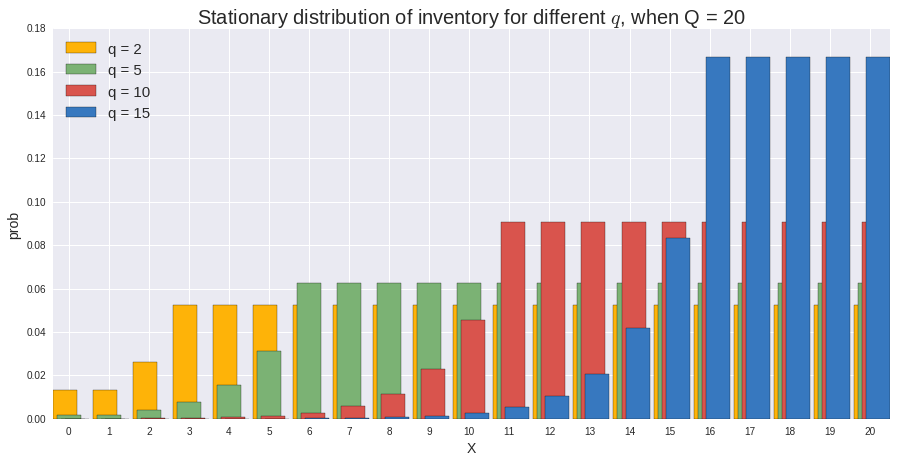

In [6]:
Q = 20
q_grid = [2, 5, 10, 15]
x_grid = np.arange(Q + 1)
cols = [sb.xkcd_rgb["amber"], sb.xkcd_rgb["faded green"], 
        sb.xkcd_rgb["pale red"], sb.xkcd_rgb["windows blue"]]

shift, width = .1, .6   # degree of overlaps, width of the bars

fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Stationary distribution of inventory for different $q$, when Q = {:d}\
'.format(Q), fontsize = 20)
ax.set_xticks(x_grid + .4)
ax.set_xticklabels(x_grid)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('prob', fontsize = 14)

for i, q in enumerate(q_grid):
    dist_q = qe.MarkovChain(stoch_kernel(q, Q)).stationary_distributions.squeeze() 
    ax.bar(x_grid + shift*i, dist_q, width, label = 'q = {:d}'.format(q), color = cols[i])

ax.legend(loc = 2, fontsize = 15)

**Interpretation:**

Increasing the lower threshold makes the stationary distribution more concentrated around $Q$. This is a simple cosequence of the fact that the demand shock is independent of the states, so the lower the difference $Q-q$, the more likely that the firm refills its inventory and starts next period with $X$ close to $Q$. Using the "LLN interpretation" (which is valid given global stability), the higher the lower threshold, the more time the firm spends around $Q$.    